In [3]:
# Test plotting with basemap
import pandas as pd
import os
import numpy as np
import shapely as sp
from os.path import join as opj

import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from mpl_toolkits.basemap import Basemap
%matplotlib inline

DATA_DIR = "/Users/anayahall/projects/compopt/data"
OUT_DIR = "/Users/anayahall/projects/compopt/maps"

CA = gpd.read_file(opj(DATA_DIR, "raw/CA_Counties/CA_Counties_TIGER2016.shp"))
CA = CA.to_crs(epsg=4326)
# print("Ca_proj crs: ", CA_proj.crs)
CA.head()

# # LOAD BIOMASS DATA
# gbm_pts, tbm_pts = MergeInventoryAndCounty(
#     gross_inventory     = opj(DATA_DIR, "raw/biomass.inventory.csv"),
#     technical_inventory = opj(DATA_DIR, "raw/biomass.inventory.technical.csv"),
#     county_shapefile    = opj(DATA_DIR, "raw/CA_Counties/CA_Counties_TIGER2016.shp"),
#     fips_data           = opj(DATA_DIR, "interim/CA_FIPS.csv")
# )
# counties = tbm_pts # could change to GBM

ej = gpd.read_file(opj(DATA_DIR, "calenviroscreen/CESJune2018Update_SHP/CES3June2018Update.shp"))


rangelands = gpd.read_file(opj(DATA_DIR, "raw/CA_FMMP_G/gl_bycounty/grazingland_county.shp"))
# rangelands = gpd.read_file(opj(DATA_DIR, "raw/CA_FMMP_G/grazingland_dis/CA_grazingland.shp"))
rangelands = rangelands.to_crs(epsg=4326)

swis =  gpd.read_file(opj(DATA_DIR, "clean/clean_swis.shp"))


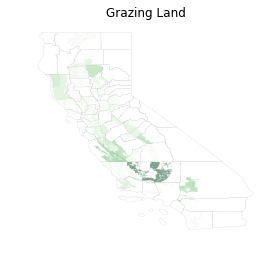

In [ ]:
f, ax = plt.subplots()
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.1, edgecolor = "grey")
rangelands.plot(ax= ax, column = 'Shape_Area', cmap = "Greens", alpha = .5)
ax.axis('off')
ax.set_title('Grazing Land', fontdict={'fontsize': '12', 'fontweight' : '3'})
# plt.savefig(opj(OUT_DIR, "rangelands.png"), dpi=300)

In [ ]:
#CALIFORNIA BOUNDING BOX westlimit=-124.48; southlimit=32.53; eastlimit=-114.13; northlimit=42.01


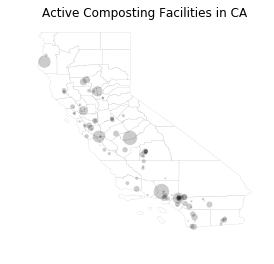

In [11]:
f, ax = plt.subplots()
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.1, edgecolor = "grey")
swis.plot(ax = ax, markersize = swis.cap_m3/3000, marker = 'o', color = 'black', alpha=.4, linewidth=0)
ax.axis('off')
ax.set_title('Active Composting Facilities in CA', fontdict={'fontsize': '12', 'fontweight' : '3'})
# plt.savefig("maps/FacilitiesbyCapacity.png", dpi=300)

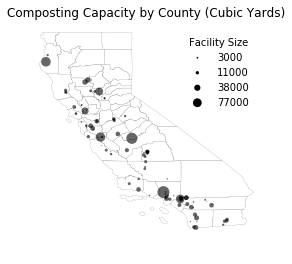

In [17]:
plotvar = swis['cap_m3']

# before plotting prep legend
c = []
for i in [10, 25, 50, 75]:
    c.append(int(round(np.percentile(plotvar, i), -3)))

# Map Capacity by County
f, ax = plt.subplots(1)
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.1, edgecolor = "black")
# capmap.plot(ax = ax, column = plotvar, cmap = "Oranges", legend = True)
swis.set_geometry('geometry').plot(ax = ax, markersize = swis.cap_m3/5000, marker = 'o', 
                                  legend = True, color = 'black', alpha=.6, linewidth=0)
ax.axis('off')
ax.set_title('Composting Capacity by County (Cubic Yards)', fontdict={'fontsize': '12', 'fontweight' : '3'})

l1 = plt.scatter([],[], s=c[0]/1000, edgecolors='none', color = "black")
l2 = plt.scatter([],[], s=c[1]/1000, edgecolors='none', color = "black")
l3 = plt.scatter([],[], s=c[2]/1000, edgecolors='none', color = "black")
l4 = plt.scatter([],[], s=c[3]/1000, edgecolors='none', color = "black")

labels = [str(c[0]), str(c[1]), str(c[2]), str(c[3])]
# labels = [str(c[0]), str(c[1]), "35000", "75000"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol = 1, frameon=False, fontsize=10,
handlelength=2, loc = 1, borderpad = 1,
handletextpad=1, title='Facility Size', scatterpoints = 1)
